# **BREAST_CANCER CLASSIFICATION**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## **Overview Dataset**

In [ ]:
#load breast_cancer dataset
breast_cancer = load_breast_cancer()
type(dir(breast_cancer))

list

In [ ]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#description of breast_cancer dataset
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [ ]:
print(breast_cancer.data)
print("각 데이터는 {0}개의 숫자로 이루어져있습니다".format(len(breast_cancer.data[0])))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
각 데이터는 30개의 숫자로 이루어져있습니다


In [ ]:
breast_cancer_data=breast_cancer.data
breast_cancer_label=breast_cancer.target
breast_cancer_target_names=breast_cancer.target_names

print("Dataset의 shape는 {0}이다".format(breast_cancer_data.shape))
print("Dataset target의 shape는 {0}이다".format(breast_cancer_label.shape))
print("Dataset의 target 구성은 {0}이다".format(breast_cancer_target_names))

Dataset의 shape는 (569, 30)이다
Dataset target의 shape는 (569,)이다
Dataset의 target 구성은 ['malignant' 'benign']이다


In [ ]:
import pandas as pd

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["label"] = breast_cancer.target
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## **Preprocessing Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(breast_cancer_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_scale,
                                                    breast_cancer_label,
                                                    test_size=0.3,
                                                    random_state=15)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train), ', y_test 개수: ', len(y_test))

X_train 개수:  398 , X_test 개수:  171
y_train 개수:  398 , y_test 개수:  171


## **Training with various models**

### **DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92        63
           1       0.93      0.98      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Text(0.5, 1.0, 'Breast_Cancer_Classification_CM')

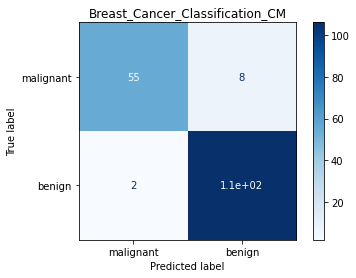

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt

title="Breast_Cancer_Classification_CM"
disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                             display_labels=breast_cancer_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)

### **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.94      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Text(0.5, 1.0, 'Breast_Cancer_Classification_CM')

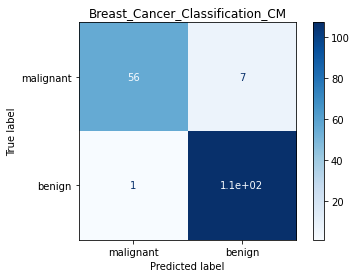

In [ ]:
disp = plot_confusion_matrix(random_forest, X_test, y_test,
                             display_labels=breast_cancer_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Breast_Cancer_Classification_CM")

### **SVM Classifier**

In [ ]:
from sklearn import svm
import numpy as np

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Text(0.5, 1.0, 'Breast_Cancer_Classification_CM')

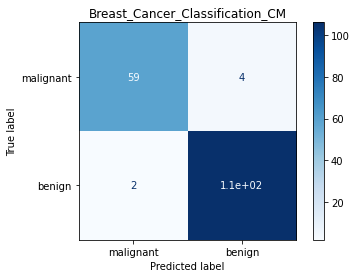

In [ ]:
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                             display_labels=breast_cancer_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Breast_Cancer_Classification_CM")

### **SGD Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss='modified_huber',max_iter=500)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Text(0.5, 1.0, 'Breast_Cancer_Classification_CM')

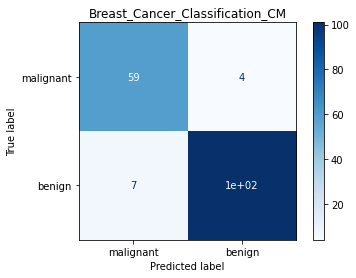

In [ ]:
disp = plot_confusion_matrix(sgd_model, X_test, y_test,
                             display_labels=breast_cancer_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Breast_Cancer_Classification_CM")

### **LogisticClassifier**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(random_state=0, max_iter=10000,solver='saga').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Text(0.5, 1.0, 'Breast_Cancer_Classification_CM')

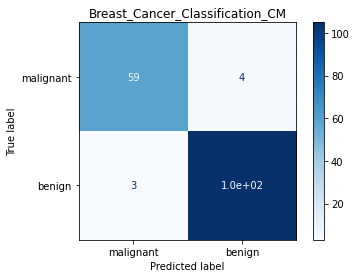

In [ ]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=breast_cancer_target_names,
                             cmap=plt.cm.Blues)
disp.ax_.set_title("Breast_Cancer_Classification_CM")

## **COMMENTS**



*   DecisionTree와 SGD 이외의 모델은 정확도가 95%가 넘어간다.(물론, DecisionTree와 SGD도 parameters를 조절하면 넘을거라고 예상)
*   하자만, 이러한 breast_cancer 분류 문제에서는 절대로 암에 대한 진단을 병이 존재하는데, 거짓으로 판단하는 모델은 병원의 신뢰도와 환자에게 상태가 더 악화되어서 진료를 받게 되는 경우가 생길 수도 있기 때문에 RECALL에 대해 더욱 주의깊게 봐야한다
*   그리하여, 결과만을 봤을 때는 LOGISTIC CLASSIFIER & SVM CLASSIFER를 채택하는게 긍정적이다.

